About Data

Show_ID-Id of the movie/TV show

type-Movie or TV show

title-Title of the movie/TV show

director-Director of the movie/TV show

Cast-actors/actress who have acted in the movie/TV show

country-Country the movie/TV show belongs to

date_added-Aired dated-Released date on netflix

release year-Original movie/TV show release date

rating-Rating of the movie/TV show

duration-Length of the movie

genre-Genre of the movie

Description-Summary of the movie

Importing the Required the Libraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [27]:
df=pd.read_csv('NetFlix.csv')

WORK FLOW

-Understanding the dataset 
-Check the missing values 
-Techniques to solve the error
-EDA
-Conclusion


In [28]:

pd.set_option('display.max_columns', None)  

In [29]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,14-Aug-20,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,15-Dec-17,2008,TV-MA,143,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...
2,s100,Movie,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",Indonesia,05-Jan-19,2016,TV-PG,124,"Dramas, International Movies, Sports Movies",Three Indonesian women break records by becomi...
3,s1000,Movie,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,"Alan Ritchson, Darin Brooks, James Cade, Rob R...",United States,01-Mar-16,2016,R,90,Comedies,New NFL star Thad buys his old teammates' belo...
4,s1001,TV Show,Blue Planet II,NaN,David Attenborough,United Kingdom,03-Dec-18,2017,TV-G,1,"British TV Shows, Docuseries, Science & Nature TV",This sequel to the award-winning nature series...


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   int64 
 10  genres        7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(2), object(10)
memory usage: 730.2+ KB


In [31]:
df.describe()

,release_year,duration
count,7787.000000,7787.000000
mean,2013.932580,69.122769
std,8.757395,50.950743
min,1925.000000,1.000000
25%,2013.000000,2.000000
50%,2017.000000,88.000000
75%,2018.000000,106.000000
max,2021.000000,312.000000


In [32]:
#Checking Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'genres', 'description'],
      dtype='object')

In [33]:
#Checking the Shape 
df.shape

(7787, 12)

In [34]:
#Checking Data type
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration         int64
genres          object
description     object
dtype: object

In [35]:
#Data Cleaning part

In [36]:
df['date_added']=pd.to_datetime(df['date_added'])
df['date_added'].dtype

dtype('<M8[ns]')

In [37]:
#Checking the Null Values
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
genres             0
description        0
dtype: int64

In [47]:
#Hence these columns are usefull for further analysis
df.drop(columns=["show_id","cast"],inplace=True)

In [39]:
#Checking the percentage of Null values
#We can put all our work together in a single line of code beginning with our Netflix DataFrame. We remove excess decimal noise by rounding and then multiply each value by 100 to get a percentage.
df.isna().mean().round(4) * 100

show_id          0.00
type             0.00
title            0.00
director        30.68
cast             9.22
country          6.51
date_added       0.13
release_year     0.00
rating           0.09
duration         0.00
genres           0.00
description      0.00
dtype: float64

In [40]:
#Viewing Null Values in rating columns
df[df['rating'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
1513,s2360,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,2016-12-01,2013,NaN,1,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
2958,s3661,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,2018-02-01,2015,NaN,1,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
3042,s3737,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,NaN,74,Movies,"Louis C.K. muses on religion, eternal love, gi..."
3043,s3738,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,NaN,84,Movies,Emmy-winning comedy writer Louis C.K. brings h...
3044,s3739,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,NaN,66,Movies,The comic puts his trademark hilarious/thought...
3695,s4324,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,2017-03-01,2015,NaN,115,Dramas,"Amid the chaos and horror of World War II, a c..."
6444,s68,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,2017-01-26,2017,NaN,37,Movies,Oprah Winfrey sits down with director Ava DuVe...


In [42]:
df['rating'].unique()

array(['TV-MA', 'TV-PG', 'R', 'TV-G', 'PG-13', 'TV-14', 'TV-Y', 'PG',
       'TV-Y7', 'NR', 'G', 'TV-Y7-FV', nan, 'UR', 'NC-17'], dtype=object)

In [43]:
#Hence we can see there is nan value and if we search about those nan values content it shows that they are kids show

In [44]:
#Replacing the data with TV-14
l=[1513,2958]
for i in l:
    df["rating"].iloc[i]="TV-14"

C:\Users\aakas\AppData\Local\Temp\ipykernel_12512\197078828.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["rating"].iloc[i]="TV-14"


In [45]:
#same goes for movie also
l=[3042,3043,3044,3695,6444]
for i in l:
    df["rating"].iloc[i]="TV-MA"

C:\Users\aakas\AppData\Local\Temp\ipykernel_12512\1564154258.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["rating"].iloc[i]="TV-MA"


In [46]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             0
duration           0
genres             0
description        0
dtype: int64

In [48]:
df["country"].fillna("Omitted",inplace=True)

In [49]:
df['director'].fillna("Unkown",inplace=True)

In [50]:
df[df["date_added"].isnull()]

,type,title,director,country,date_added,release_year,rating,duration,genres,description
1406,TV Show,Frasier,Unkown,United States,NaT,2003,TV-PG,11,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
1433,TV Show,Friends,Unkown,United States,NaT,2003,TV-14,10,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
1730,TV Show,Gunslinger Girl,Unkown,Japan,NaT,2008,TV-14,2,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
1767,TV Show,A Young Doctor's Notebook and Other Stories,Unkown,United Kingdom,NaT,2013,TV-MA,2,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
2640,TV Show,Kikoriki,Unkown,Omitted,NaT,2010,TV-Y,2,Kids' TV,A wacky rabbit and his gang of animal pals hav...
2771,TV Show,La Familia P. Luche,Unkown,United States,NaT,2012,TV-14,3,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
3275,TV Show,Maron,Unkown,United States,NaT,2016,TV-MA,4,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
4599,TV Show,Red vs. Blue,Unkown,United States,NaT,2015,NR,13,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
5001,TV Show,Anthony Bourdain: Parts Unknown,Unkown,United States,NaT,2018,TV-PG,5,Docuseries,This CNN original series has chef Anthony Bour...
5630,TV Show,The Adventures of Figaro Pho,Unkown,Australia,NaT,2015,TV-Y7,2,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [51]:
df["date_added"].fillna(df["date_added"].median(),inplace=True)

In [52]:
df.isnull().sum()

type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
genres          0
description     0
dtype: int64

In [53]:
#Here we can see our whole Dataset is Cleaned and ready for visualization

In [54]:
#Now we add new more columns related to months, days

In [56]:
from datetime import datetime as dt
df["month_name"]=df["date_added"].dt.month_name()
df["Day"]=df["date_added"].dt.day_name()
df["weekday"]=df.date_added.dt.weekday
df.head()

,type,title,director,country,date_added,release_year,rating,duration,genres,description,month_name,Day,weekday
0,TV Show,3%,Unkown,Brazil,2020-08-14,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,August,Friday,4
1,Movie,1920,Vikram Bhatt,India,2017-12-15,2008,TV-MA,143,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...,December,Friday,4
2,Movie,3 Heroines,Iman Brotoseno,Indonesia,2019-01-05,2016,TV-PG,124,"Dramas, International Movies, Sports Movies",Three Indonesian women break records by becomi...,January,Saturday,5
3,Movie,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,United States,2016-03-01,2016,R,90,Comedies,New NFL star Thad buys his old teammates' belo...,March,Tuesday,1
4,TV Show,Blue Planet II,Unkown,United Kingdom,2018-12-03,2017,TV-G,1,"British TV Shows, Docuseries, Science & Nature TV",This sequel to the award-winning nature series...,December,Monday,0


In [58]:
df.describe(include="object").T

,count,unique,top,freq
type,7787,2,Movie,5377
title,7787,7787,3%,1
director,7787,4050,Unkown,2389
country,7787,682,United States,2555
rating,7787,14,TV-MA,2868
genres,7787,492,Documentaries,334
description,7787,7769,Multiple women report their husbands as missin...,3
month_name,7787,12,December,833
Day,7787,7,Friday,2297


In [60]:
for i in df.columns:
    print(i,"---->",df[i].unique())

type ----> ['TV Show' 'Movie']
title ----> ['3%' '1920' '3 Heroines' ... 'Blue Is the Warmest Color' 'Blue Jasmine'
 'Blue Jay']
director ----> ['Unkown' 'Vikram Bhatt' 'Iman Brotoseno' ... 'Miguel Cohan, Miguel Cohan'
 'Abdellatif Kechiche' 'Woody Allen']
country ----> ['Brazil' 'India' 'Indonesia' 'United States' 'United Kingdom'
 'United States, France' 'Germany, United States' 'Canada' 'Japan'
 'Thailand' 'Omitted' 'Denmark, Sweden, Israel, United States'
 'Ireland, United Kingdom' 'Spain' 'United States, Iceland' 'Colombia'
 'Germany' 'United Arab Emirates, United Kingdom, India' 'New Zealand'
 'Netherlands' 'Egypt' 'Australia' 'Sweden' 'Russia'
 'Norway, Germany, Sweden' 'Finland, France' 'Denmark' 'Philippines'
 'Denmark, Spain' 'United Kingdom, Russia' 'Denmark, France, Poland'
 'Lebanon' 'United States, United Kingdom, Australia'
 'Canada, United States' 'Singapore' 'Poland' 'Bulgaria, United States'
 'South Korea' 'India, United Kingdom' 'United States, Canada, Ireland'
 'Can

<AxesSubplot:>

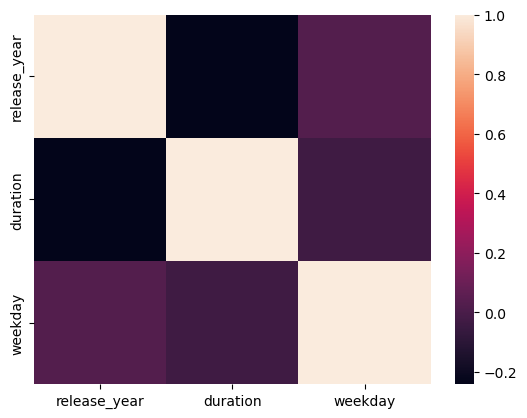

In [61]:
sns.heatmap(df.corr(),data=df)

In [62]:
df["genres"].str.split(",",expand=True)

,0,1,2
0,International TV Shows,TV Dramas,TV Sci-Fi & Fantasy
1,Horror Movies,International Movies,Thrillers
2,Dramas,International Movies,Sports Movies
3,Comedies,None,None
4,British TV Shows,Docuseries,Science & Nature TV
...,...,...,...
7782,International TV Shows,Reality TV,None
7783,Anime Series,International TV Shows,None
7784,Dramas,Independent Movies,International Movies
7785,Comedies,Dramas,Independent Movies


In [63]:
df["genres1"]=df["genres"].str.split(",",expand=True)[0]
df["genres2"]=df["genres"].str.split(",",expand=True)[1]
df["genres3"]=df["genres"].str.split(",",expand=True)[2]

In [64]:
df

,type,title,director,country,date_added,release_year,rating,duration,genres,description,month_name,Day,weekday,genres1,genres2,genres3
0,TV Show,3%,Unkown,Brazil,2020-08-14,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,August,Friday,4,International TV Shows,TV Dramas,TV Sci-Fi & Fantasy
1,Movie,1920,Vikram Bhatt,India,2017-12-15,2008,TV-MA,143,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...,December,Friday,4,Horror Movies,International Movies,Thrillers
2,Movie,3 Heroines,Iman Brotoseno,Indonesia,2019-01-05,2016,TV-PG,124,"Dramas, International Movies, Sports Movies",Three Indonesian women break records by becomi...,January,Saturday,5,Dramas,International Movies,Sports Movies
3,Movie,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,United States,2016-03-01,2016,R,90,Comedies,New NFL star Thad buys his old teammates' belo...,March,Tuesday,1,Comedies,None,None
4,TV Show,Blue Planet II,Unkown,United Kingdom,2018-12-03,2017,TV-G,1,"British TV Shows, Docuseries, Science & Nature TV",This sequel to the award-winning nature series...,December,Monday,0,British TV Shows,Docuseries,Science & Nature TV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,TV Show,Blown Away,Unkown,Canada,2019-07-12,2019,TV-14,1,"International TV Shows, Reality TV",Ten master artists turn up the heat in glassbl...,July,Friday,4,International TV Shows,Reality TV,None
7783,TV Show,Blue Exorcist,Unkown,Japan,2020-09-01,2017,TV-MA,2,"Anime Series, International TV Shows",Determined to throw off the curse of being Sat...,September,Tuesday,1,Anime Series,International TV Shows,None
7784,Movie,Blue Is the Warmest Color,Abdellatif Kechiche,"France, Belgium, Spain",2016-08-26,2013,NC-17,180,"Dramas, Independent Movies, International Movies","Determined to fall in love, 15-year-old Adele ...",August,Friday,4,Dramas,Independent Movies,International Movies
7785,Movie,Blue Jasmine,Woody Allen,United States,2019-03-08,2013,PG-13,98,"Comedies, Dramas, Independent Movies",The high life leads to high anxiety for a fash...,March,Friday,4,Comedies,Dramas,Independent Movies


In [65]:
df['type'].value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

United States     2555
India              923
Omitted            507
United Kingdom     397
Japan              226
South Korea        183
Canada             177
Spain              134
France             115
Egypt              101
Name: country, dtype: int64


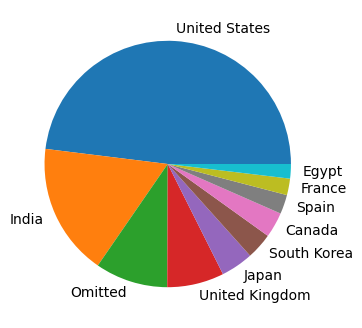

In [69]:
## Top 10 counties who produced movies and tv shows
a=df["country"].value_counts().head(10)
print(a)
plt.figure(figsize=(4,4))
plt.pie(a,labels=df["country"].value_counts().head(10).index)
plt.show()

In [70]:
df.head(2)

,type,title,director,country,date_added,release_year,rating,duration,genres,description,month_name,Day,weekday,genres1,genres2,genres3
0,TV Show,3%,Unkown,Brazil,2020-08-14,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,August,Friday,4,International TV Shows,TV Dramas,TV Sci-Fi & Fantasy
1,Movie,1920,Vikram Bhatt,India,2017-12-15,2008,TV-MA,143,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...,December,Friday,4,Horror Movies,International Movies,Thrillers


December     833
October      785
January      757
November     738
March        679
September    619
August       618
April        601
July         600
May          543
Name: month_name, dtype: int64


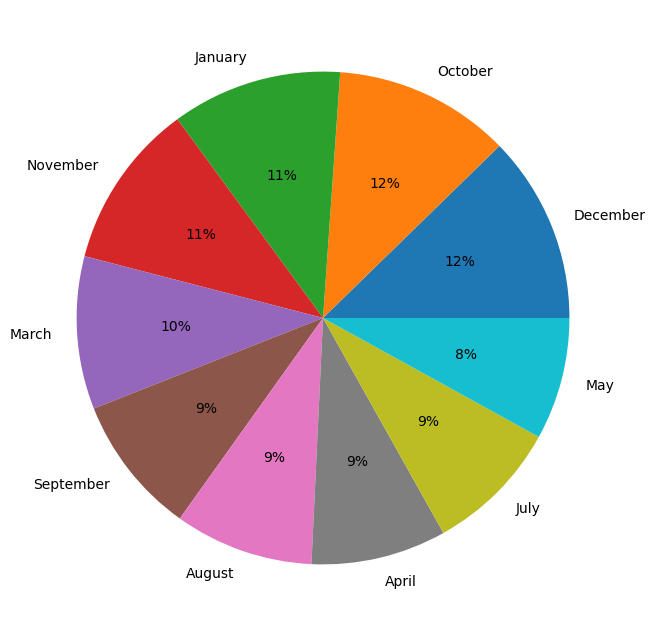

In [77]:
year=df["month_name"].value_counts().head(10)
print(year)
plt.figure(figsize=(8,8))
plt.pie(year,labels=df["month_name"].value_counts().head(10).index,autopct="%0.0f%%")
plt.show()

2018    1121
2017    1012
2019     996
2016     882
2020     868
2015     541
2014     334
2013     267
2012     219
2010     173
Name: release_year, dtype: int64


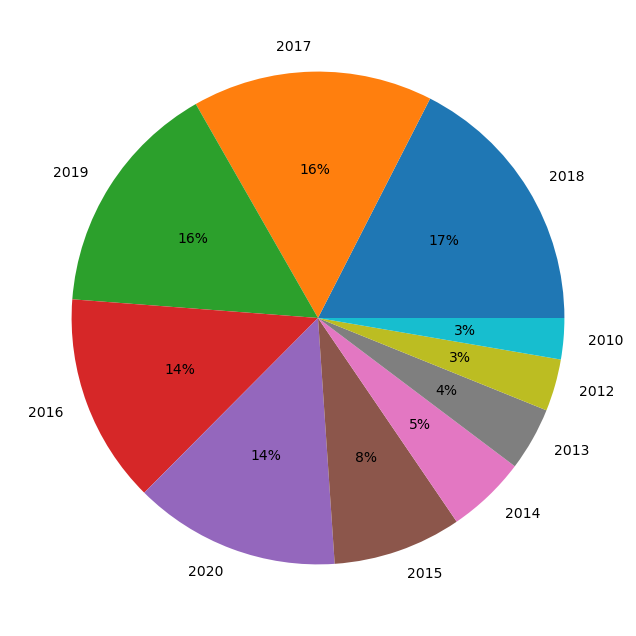

In [78]:
year=df["release_year"].value_counts().head(10)
print(year)
plt.figure(figsize=(8,8))
plt.pie(year,labels=df["release_year"].value_counts().head(10).index,autopct="%0.0f%%")
plt.show()

TV-MA       2868
TV-14       1933
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64


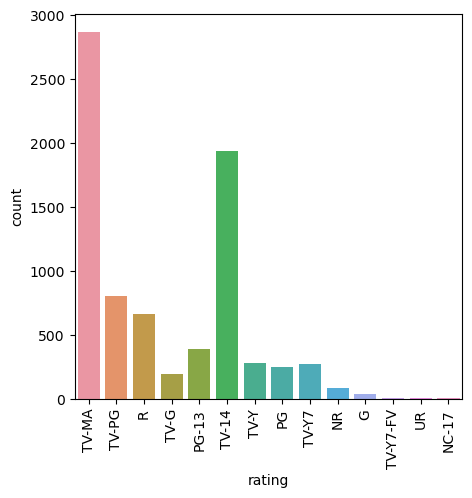

In [81]:
print(df["rating"].value_counts())
plt.figure(figsize=(5,5))
plt.xticks(rotation=90)
sns.countplot(x="rating",data=df);

December     833
October      785
January      757
November     738
March        679
September    619
August       618
April        601
July         600
May          543
June         542
February     472
Name: month_name, dtype: int64


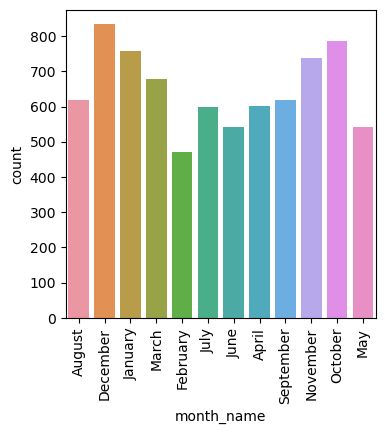

In [85]:
print(df["month_name"].value_counts())
plt.figure(figsize=(4,4))
sns.countplot(x="month_name",data=df)
plt.xticks(rotation=90);

Friday       2297
Thursday     1147
Tuesday      1070
Wednesday    1020
Monday        814
Saturday      731
Sunday        708
Name: Day, dtype: int64


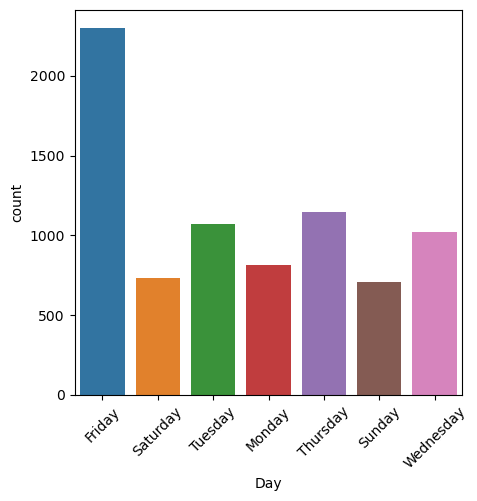

In [87]:
print(df["Day"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot(x="Day",data=df)
plt.xticks(rotation=45);

Total weekdays release are month_name  weekday
April       4          153
            2          110
            0           74
            1           65
            3           55
August      4          148
            3          146
            1           89
            2           80
            0           71
December    4          204
            1          179
            3          100
            0           79
            2           66
February    4          169
            2           86
            3           70
            1           43
            0           29
January     4          224
            2          176
            1          108
            0          105
            3           62
July        4          153
            0           88
            2           75
            3           61
            1           48
June        4          163
            3          112
            0           60
            1           54
            2           47
March   

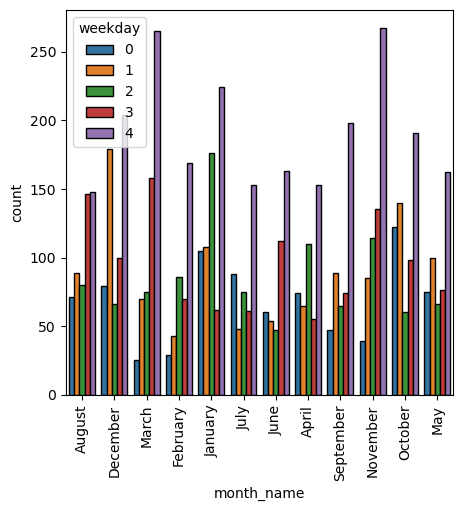

In [89]:
week_t=df[df["weekday"]<5]
weekend_t=df[df["weekday"]>=5]
print("Total weekdays release are",week_t.groupby("month_name")["weekday"].value_counts())
plt.figure(figsize=(5,5),dpi=100)
sns.countplot(x="month_name",hue="weekday",data=week_t,edgecolor="black")
plt.xticks(rotation=90);

In [90]:
week_t.groupby("month_name")["weekday"].sum().sort_values(ascending=False).reset_index()

,month_name,weekday
0,November,1786
1,March,1754
2,January,1542
3,December,1427
4,October,1318
5,August,1279
6,September,1233
7,June,1136
8,May,1108
9,February,1101


Total weekend release are month_name  weekday
December    6          113
July        6          105
October     6           96
December    5           92
June        5           83
October     5           78
April       5           78
September   6           75
            5           71
July        5           70
April       6           66
August      5           62
November    6           57
January     6           49
March       6           46
February    5           44
November    5           41
March       5           40
May         5           39
January     5           33
February    6           31
May         6           25
June        6           23
August      6           22
Name: weekday, dtype: int64


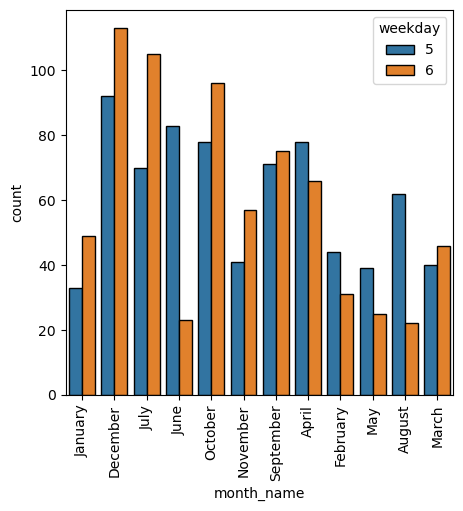

In [91]:
print("Total weekend release are",weekend_t.groupby("month_name")["weekday"].value_counts().sort_values(ascending=False))
plt.figure(figsize=(5,5),dpi=100)
sns.countplot(x="month_name",hue="weekday",data=weekend_t,edgecolor="black")
plt.xticks(rotation=90);

In [92]:
tv=df[df["type"]=="TV Show"]
print(tv.groupby("type")["country"].value_counts().head(10))

type     country       
TV Show  United States     705
         Omitted           277
         United Kingdom    204
         Japan             157
         South Korea       147
         India              71
         Taiwan             68
         Canada             59
         Australia          46
         France             46
Name: country, dtype: int64


In [93]:
movie=df[df["type"]=="Movie"]
print(movie.groupby("type")["country"].value_counts().head(10))

type   country       
Movie  United States     1850
       India              852
       Omitted            230
       United Kingdom     193
       Canada             118
       Egypt               89
       Spain               89
       Turkey              73
       Philippines         70
       France              69
Name: country, dtype: int64


Dramas                          1384
Comedies                        1074
Documentaries                    751
Action & Adventure               721
International TV Shows           690
Children & Family Movies         502
Crime TV Shows                   369
Kids' TV                         359
Stand-Up Comedy                  321
Horror Movies                    244
British TV Shows                 232
Docuseries                       194
Anime Series                     148
International Movies             114
TV Comedies                      110
Reality TV                       102
Classic Movies                    77
TV Dramas                         62
Movies                            56
Thrillers                         49
TV Action & Adventure             37
Stand-Up Comedy & Talk Shows      33
Romantic TV Shows                 28
Classic & Cult TV                 21
Independent Movies                20
Anime Features                    19
Music & Musicals                  17
C

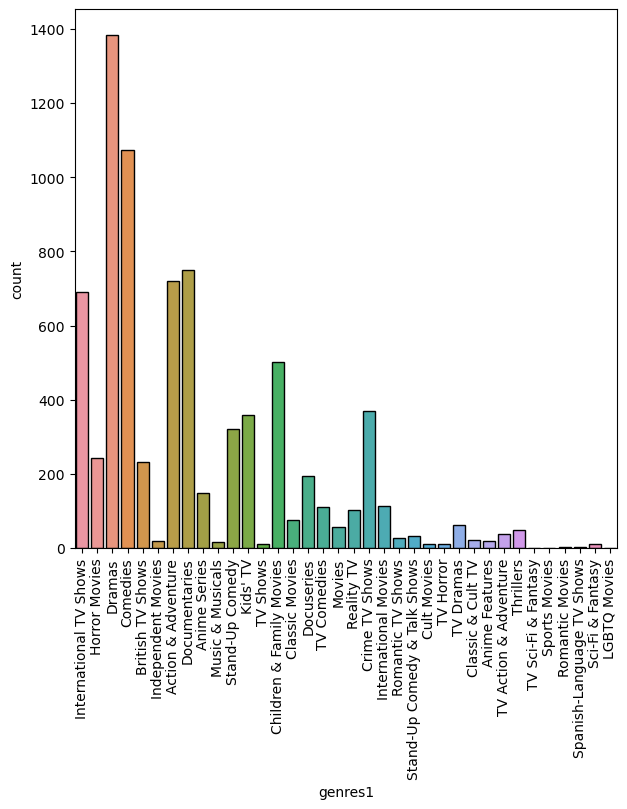

In [95]:
print(df["genres1"].value_counts())
plt.figure(figsize=(7,7),dpi=100)
sns.countplot(x="genres1",data=df,edgecolor="black")
plt.xticks(rotation=90);

In [96]:
tv["rating"].value_counts()

TV-MA       1018
TV-14        661
TV-PG        301
TV-Y7        176
TV-Y         163
TV-G          83
NR             5
R              2
TV-Y7-FV       1
Name: rating, dtype: int64

<AxesSubplot:xlabel='duration', ylabel='weekday'>

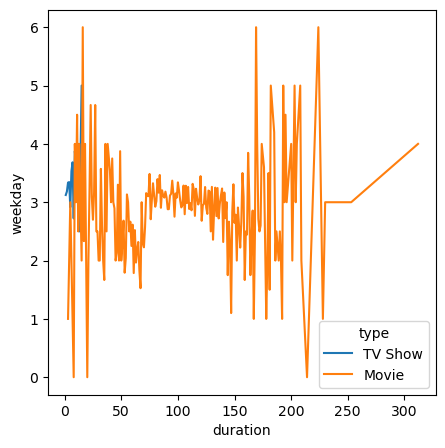

In [98]:
plt.figure(figsize=(5,5),dpi=100)
sns.lineplot(x="duration",y="weekday",hue="type",data=df,ci=None)

In [99]:
###END
